In [1]:
%matplotlib inline
import random
import os
import json
import sys
import string
import unicodedata
import pandas as pd
import seaborn as sns
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Given local path, find full path
def PathFinder(path):
    script_dir = os.path.dirname('__file__')
    fullpath = os.path.join(script_dir,path)
    return fullpath

#Read Data for Deep Learning
def ReadData(path):
    fullpath=PathFinder(path)
    return np.loadtxt(fullpath,delimiter=',')

def getScales(X,Y):
    distances = np.sqrt(np.power(X-5,2)+np.power(Y-5,2))
    scalefactor = 2.0/(1.0+np.exp(-2*distances))-0.99;
    return scalefactor

In [3]:
hvac_heuristic = ReadData('HVAC_INTERM_Heuristic.csv')
hvac_tensorflow = ReadData('HVAC_INTERM_Tensorflow.csv')

In [4]:
def get_frame(data):
    row,column = data.shape
    new_data = []
    for i in range(row-1):
        level=0
        for j in range(column):
            #if j%12 == 0:
                #level+=1
            #room = j%12
            new_data.append([int(i),int(j+1),data[i,j]])
    return pd.DataFrame(np.array(new_data),columns=['Time_Step','Room','Temperature'])

In [5]:
heuristic = get_frame(hvac_heuristic)
heuristic.Time_Step = heuristic.Time_Step.astype(int)
heuristic.Room = heuristic.Room.astype(int)
heuristic=heuristic[heuristic['Time_Step']<19]
tensorflow = get_frame(hvac_tensorflow)
tensorflow.Time_Step = tensorflow.Time_Step.astype(int)
tensorflow.Room = tensorflow.Room.astype(int)
tensorflow=tensorflow[tensorflow['Time_Step']<19]

In [6]:
heuristic['Method'] = 'Heuristic'
tensorflow['Method'] = 'Tensorflow'
df=pd.concat([tensorflow,heuristic])
df.head()

,Time_Step,Room,Temperature,Method
0,0,1,19.160001,Tensorflow
1,0,2,14.870947,Tensorflow
2,0,3,13.978526,Tensorflow
3,0,4,14.781535,Tensorflow
4,0,5,18.779733,Tensorflow


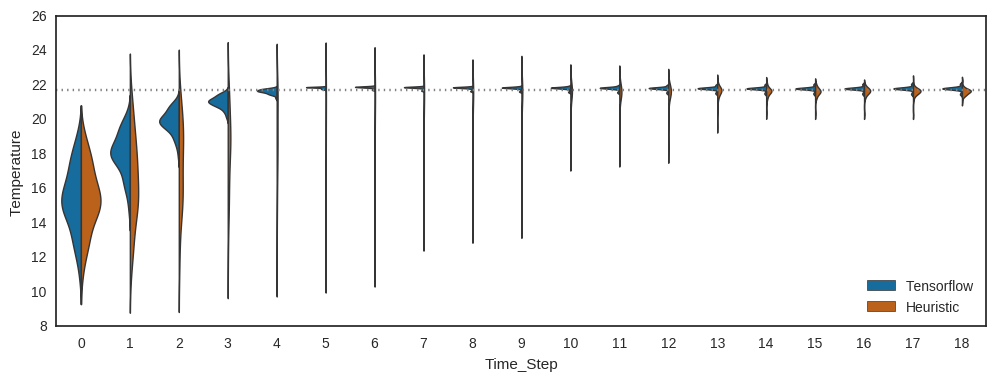

In [7]:
sns.set(style="white",  palette="colorblind", color_codes=True)
fig = plt.figure(figsize=(12, 4), dpi=100)
sns.violinplot(x="Time_Step", y="Temperature",size=1,hue="Method",palette={"Tensorflow": "b", "Heuristic": "r"},split=True,linewidth=1, inner=None, data=df)
plt.axhline(y=21.75,ls=":", c=".5")
fig.get_axes()[0].legend(loc='lower right')
plt.savefig('hvac_tensorflow_heuristic_violin.eps',format='eps')

In [8]:
#df_time=df[df['Time_Step']==7.0]
#temp=df_time.pivot("Level", "Room", "Temperature")

In [9]:
#sns.heatmap(temp,annot=True, linewidths=.5,fmt='2.2f',vmin=0, vmax=30, square=True)

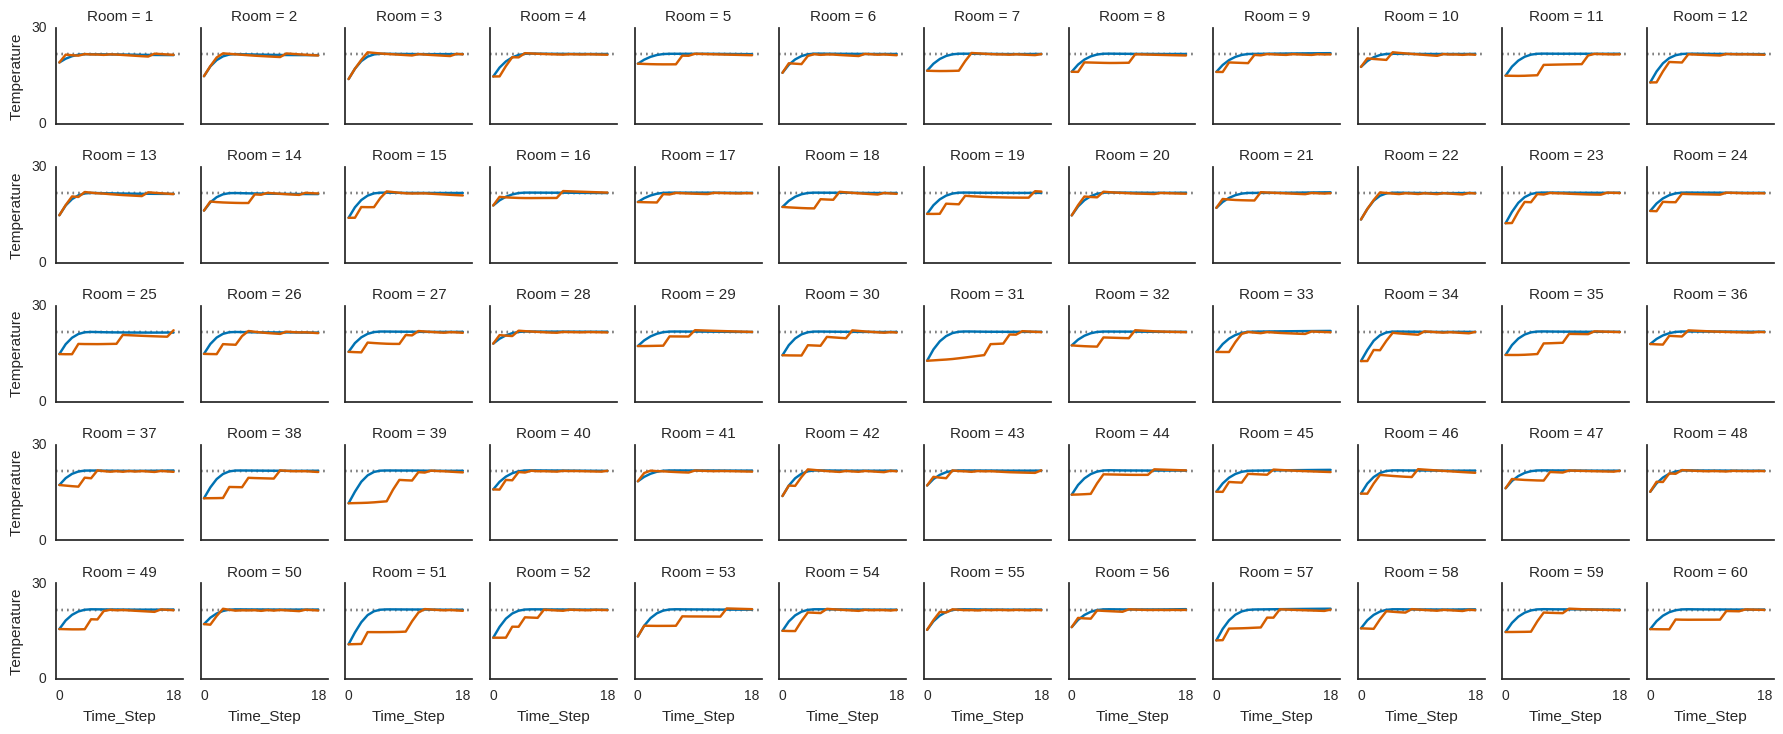

In [10]:
sns.set(style="white",  palette="colorblind", color_codes=True)
grid = sns.FacetGrid(df, col="Room", hue="Method", palette={"Tensorflow": "b", "Heuristic": "r"},col_wrap=12, size=1.5)
# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=21.75, ls=":", c=".5")
# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "Time_Step", "Temperature")

# Adjust the tick positions and labels
grid.set(xticks=[0,18], yticks=[0,30],
         xlim=(-.5, 19.5), ylim=(0, 30))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)
plt.savefig('hvac_tensorflow_heuristic_facet.eps',format='eps')